In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
pd.set_option('display.max_columns', 50)
DATA_PATH = '/content/drive/MyDrive/crime.csv'  # change to your dataset
assert Path(DATA_PATH).exists(), 'Place your CSV as data.csv or change DATA_PATH'
df = pd.read_csv("/content/drive/MyDrive/crime.csv")
df.head()

,Year,Population,Murder,Rape,Robbery,Assault,Burglary,CarTheft
0,1965,18073000,836,2320,28182,27464,183443,58452
1,1966,18258000,882,2439,30098,29142,196127,64368
2,1967,18336000,996,2665,40202,31261,219157,83775
3,1968,18113000,1185,2527,59857,34946,250918,104877
4,1969,18321000,1324,2902,64754,36890,248477,115400


In [5]:
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: []
Numerical Columns: ['Year', 'Population', 'Murder', 'Rape', 'Robbery', 'Assault', 'Burglary', 'CarTheft']


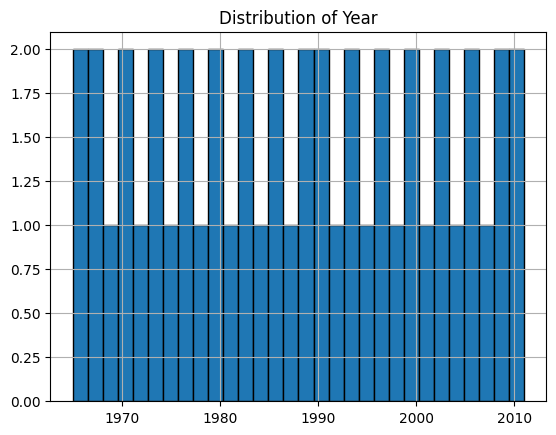

In [6]:
df[num_cols[0]].hist(bins=30, edgecolor="black")
plt.title(f"Distribution of {num_cols[0]}")
plt.show()


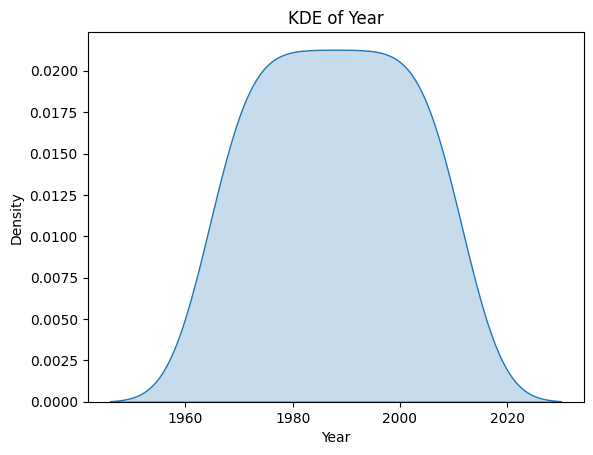

In [11]:
sns.kdeplot(df[num_cols[0]], fill=True)
plt.title(f"KDE of {num_cols[0]}")
plt.show()



In [13]:
# See column names and first few rows
print("Column Names:\n", df.columns.tolist())
print("\nSample Data:\n", df.head())
print("\nData Types:\n")
print(df.dtypes)


Column Names:
 ['Year', 'Population', 'Murder', 'Rape', 'Robbery', 'Assault', 'Burglary', 'CarTheft']

Sample Data:
    Year  Population  Murder  Rape  Robbery  Assault  Burglary  CarTheft
0  1965    18073000     836  2320    28182    27464    183443     58452
1  1966    18258000     882  2439    30098    29142    196127     64368
2  1967    18336000     996  2665    40202    31261    219157     83775
3  1968    18113000    1185  2527    59857    34946    250918    104877
4  1969    18321000    1324  2902    64754    36890    248477    115400

Data Types:

Year          int64
Population    int64
Murder        int64
Rape          int64
Robbery       int64
Assault       int64
Burglary      int64
CarTheft      int64
dtype: object


In [14]:
df["Total_Crimes"] = df[["Murder","Rape","Robbery","Assault","Burglary","CarTheft"]].sum(axis=1)
df[["Year","Total_Crimes"]].head()


,Year,Total_Crimes
0,1965,300697
1,1966,323056
2,1967,378056
3,1968,454310
4,1969,469747


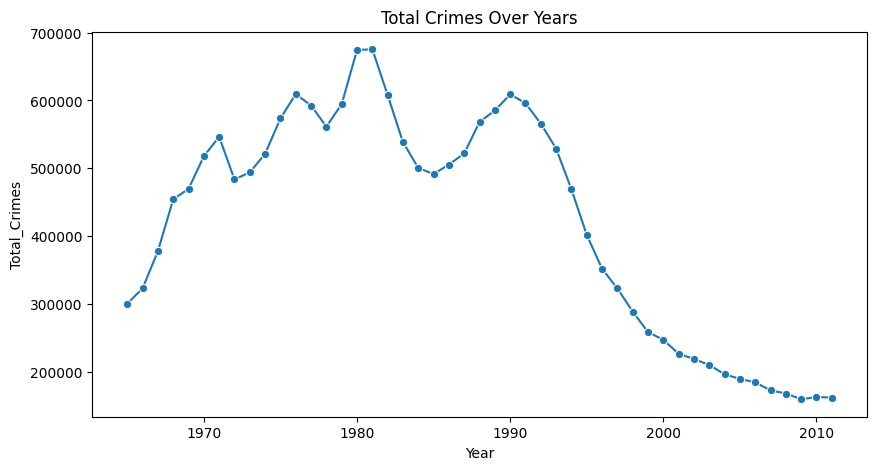

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Total_Crimes", data=df, marker="o")
plt.title("Total Crimes Over Years")
plt.show()


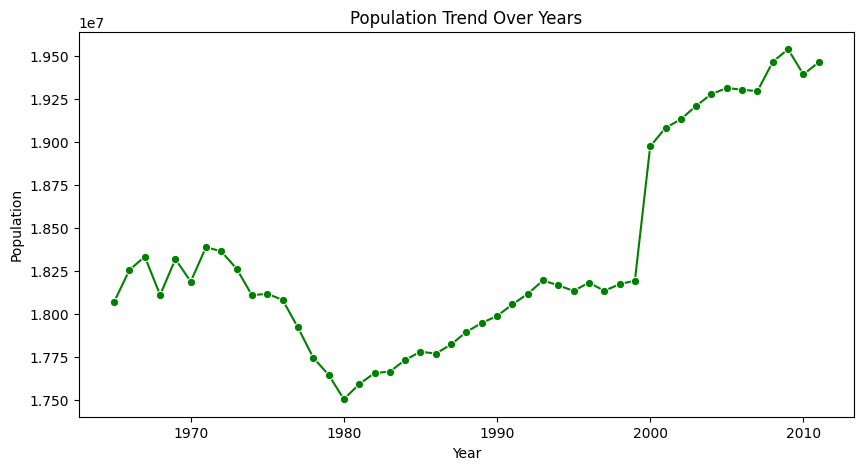

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Population", data=df, marker="o", color="green")
plt.title("Population Trend Over Years")
plt.show()


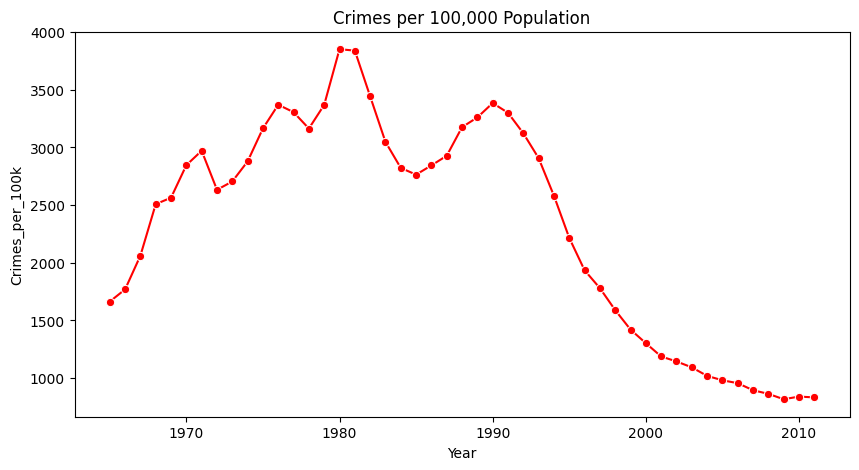

In [17]:
df["Crimes_per_100k"] = (df["Total_Crimes"] / df["Population"]) * 100000
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Crimes_per_100k", data=df, marker="o", color="red")
plt.title("Crimes per 100,000 Population")
plt.show()


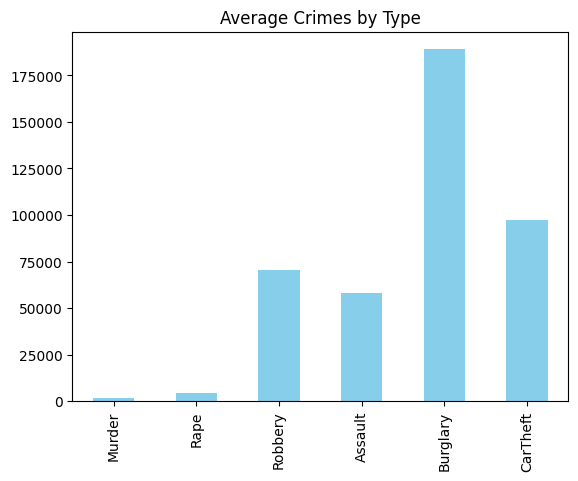

In [18]:
df[["Murder","Rape","Robbery","Assault","Burglary","CarTheft"]].mean().plot(kind="bar", color="skyblue")
plt.title("Average Crimes by Type")
plt.show()


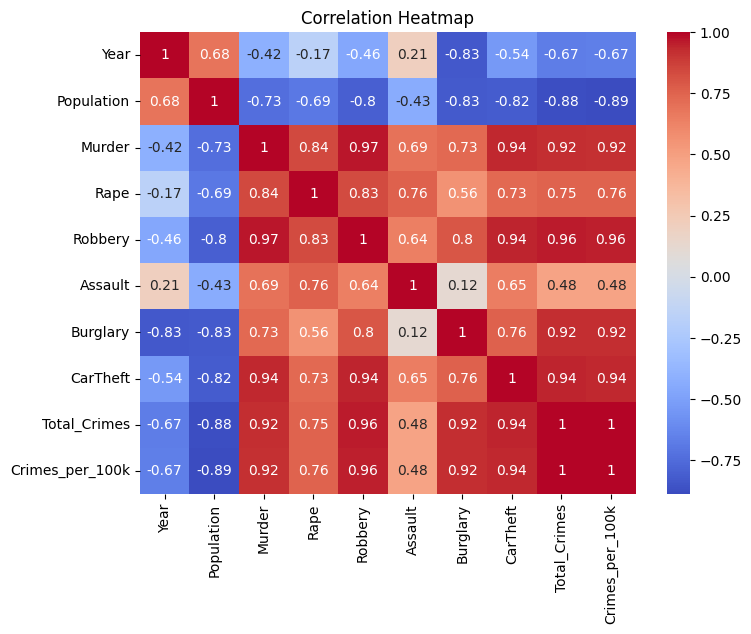

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [20]:
df.sort_values("Total_Crimes", ascending=False).head(5)


,Year,Population,Murder,Rape,Robbery,Assault,Burglary,CarTheft,Total_Crimes,Crimes_per_100k
16,1981,17594000,2166,5479,120344,60189,350422,136849,675449,3839.087189
15,1980,17506690,2228,5405,112273,60329,360925,133041,674201,3851.104920
11,1976,18084000,1969,4663,95718,54638,318919,133504,609411,3369.890511
25,1990,17990455,2605,5368,112380,92105,208813,187591,608862,3384.361318
17,1982,17659000,2013,5159,107843,59818,295245,137880,607958,3442.765729


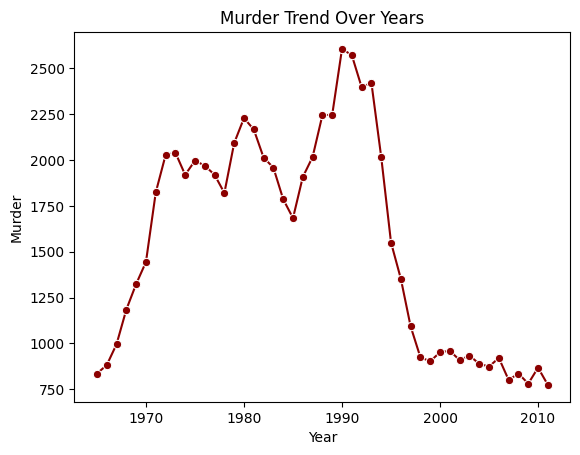

In [21]:
sns.lineplot(x="Year", y="Murder", data=df, marker="o", color="darkred")
plt.title("Murder Trend Over Years")
plt.show()


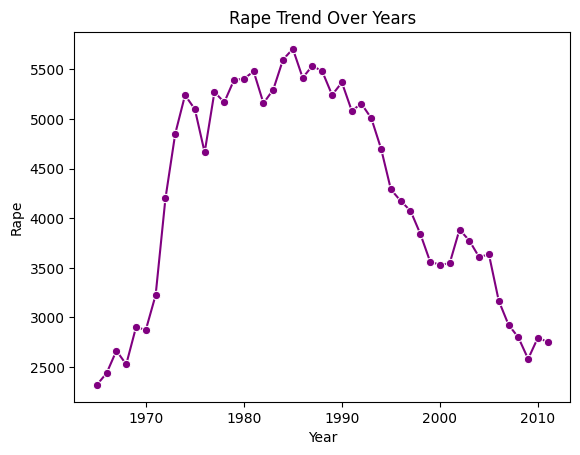

In [22]:
sns.lineplot(x="Year", y="Rape", data=df, marker="o", color="purple")
plt.title("Rape Trend Over Years")
plt.show()


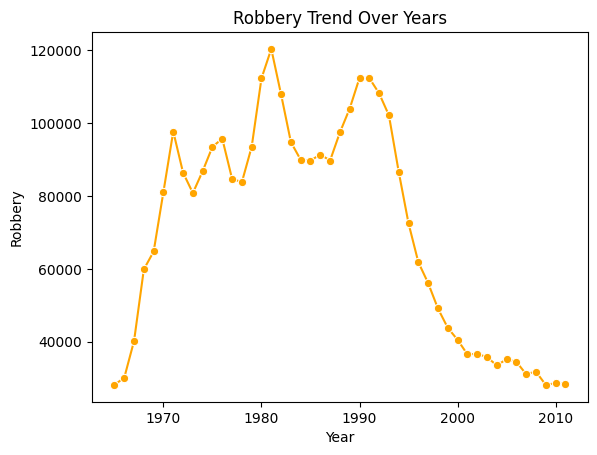

In [23]:
sns.lineplot(x="Year", y="Robbery", data=df, marker="o", color="orange")
plt.title("Robbery Trend Over Years")
plt.show()


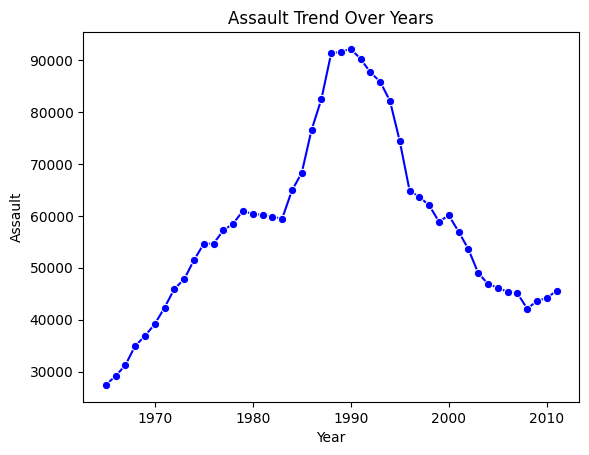

In [24]:
sns.lineplot(x="Year", y="Assault", data=df, marker="o", color="blue")
plt.title("Assault Trend Over Years")
plt.show()


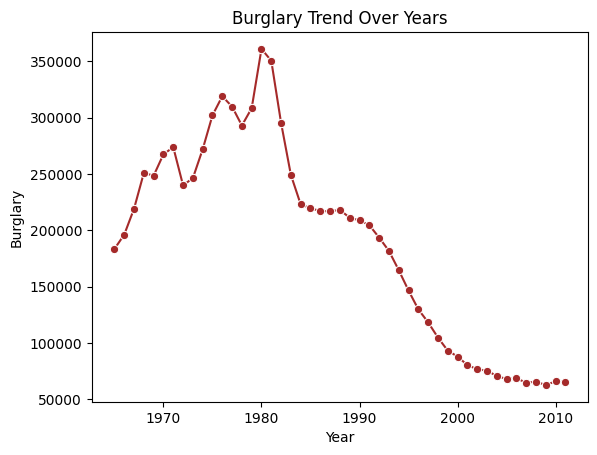

In [25]:
sns.lineplot(x="Year", y="Burglary", data=df, marker="o", color="brown")
plt.title("Burglary Trend Over Years")
plt.show()


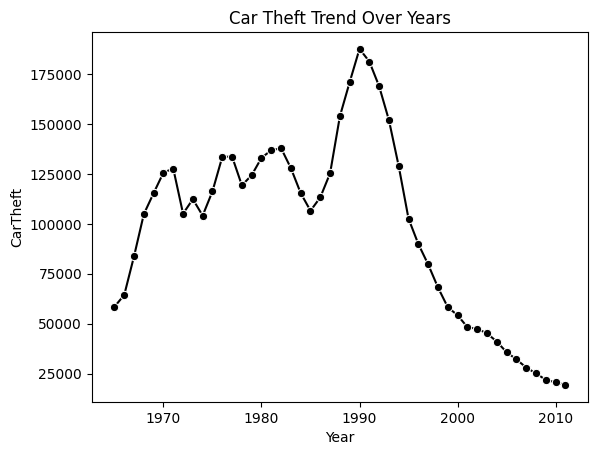

In [26]:
sns.lineplot(x="Year", y="CarTheft", data=df, marker="o", color="black")
plt.title("Car Theft Trend Over Years")
plt.show()


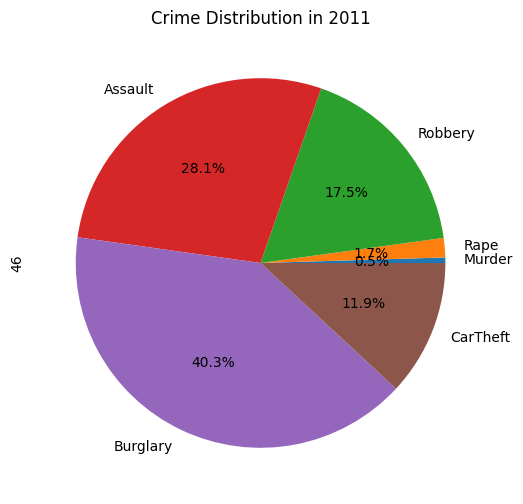

In [27]:
latest = df.iloc[-1][["Murder","Rape","Robbery","Assault","Burglary","CarTheft"]]
latest.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title(f"Crime Distribution in {df['Year'].iloc[-1]}")
plt.show()


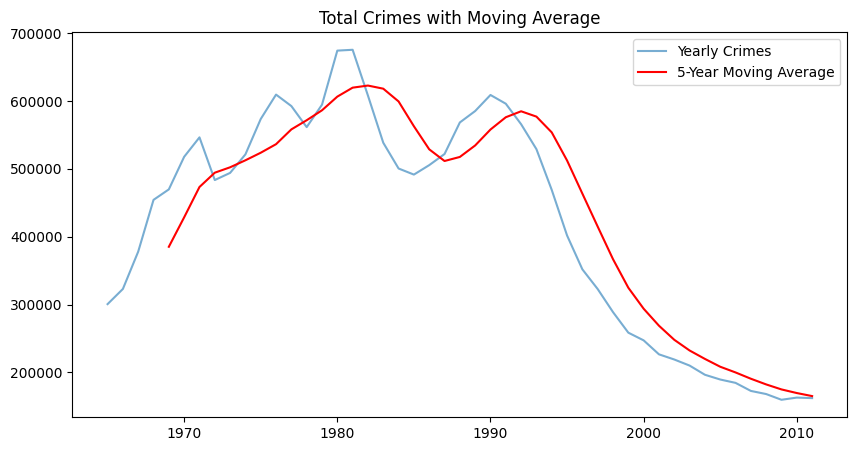

In [28]:
df["Rolling_Crimes"] = df["Total_Crimes"].rolling(5).mean()
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Total_Crimes"], label="Yearly Crimes", alpha=0.6)
plt.plot(df["Year"], df["Rolling_Crimes"], label="5-Year Moving Average", color="red")
plt.legend()
plt.title("Total Crimes with Moving Average")
plt.show()


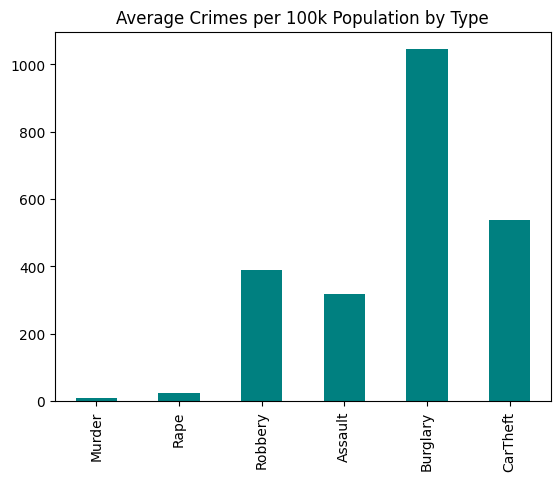

In [29]:
crime_types = ["Murder","Rape","Robbery","Assault","Burglary","CarTheft"]
((df[crime_types].div(df["Population"], axis=0)) * 100000).mean().plot(kind="bar", color="teal")
plt.title("Average Crimes per 100k Population by Type")
plt.show()


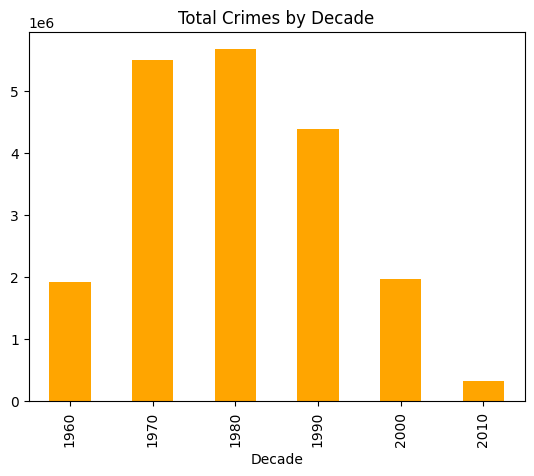

In [30]:
df["Decade"] = (df["Year"]//10)*10
df.groupby("Decade")["Total_Crimes"].sum().plot(kind="bar", color="orange")
plt.title("Total Crimes by Decade")
plt.show()


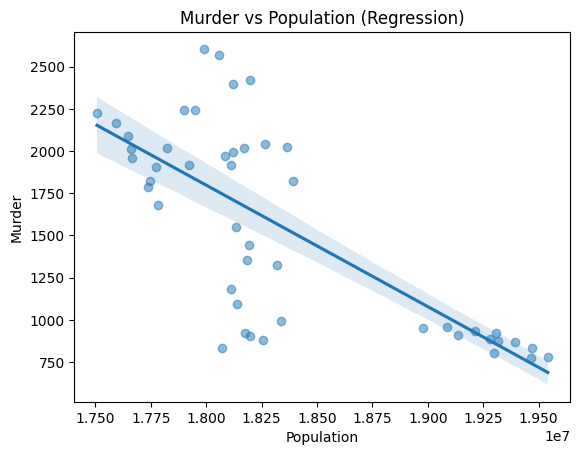

In [31]:
sns.regplot(x="Population", y="Murder", data=df, scatter_kws={"alpha":0.5})
plt.title("Murder vs Population (Regression)")
plt.show()
